In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# HIDDEN_LAYER_SIZES = (12, 4)
HIDDEN_LAYER_SIZES = 12
MAX_ITER = 500
LABELS = ['True Neg','False Pos','False Neg','True Pos']
CATEGORIES = ['Married', 'Divorced']
TEST_SIZE = 0.8
SVM_TITLE = 'SVM 20-80 Confusion Matrix'
RF_TITLE = 'Random Forest 20-80 Confusion Matrix'
NN_TITLE = 'Neural Network 20-80 Confusion Matrix'
# TEST_SIZE = 0.6
# SVM_TITLE = 'SVM 40-60 Confusion Matrix'
# RF_TITLE = 'RF 40-60 Confusion Matrix'
# NN_TITLE = 'NN 40-60 Confusion Matrix'

In [3]:
divorce= pd.read_csv(r"C:\Users\Anjali Kumari\Downloads\divorce-csv.csv",delimiter = ';')


In [4]:
display(divorce.sample(15))
display(divorce.describe())

,"Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class"
44,"4,2,3,2,4,2,0,2,3,2,4,2,4,2,3,2,4,2,4,2,3,2,4,..."
157,"0,1,0,0,0,1,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,..."
24,"4,2,3,4,4,2,0,2,3,4,4,2,4,2,3,4,4,2,4,2,3,4,4,..."
14,"3,4,3,4,3,0,1,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,..."
139,"3,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,..."
113,"0,2,2,1,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,..."
21,"4,3,3,3,4,1,0,3,3,3,4,3,4,3,3,3,4,3,4,3,3,3,4,..."
58,"3,3,3,3,3,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,..."
163,"2,0,1,0,0,0,0,0,0,2,1,0,1,0,2,2,1,0,0,0,1,0,0,..."
62,"3,2,3,2,3,2,1,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,..."


,"Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class"
count,170
unique,150
top,"3,2,3,2,3,2,1,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,..."
freq,4


In [5]:
divorce.head()

,"Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class"
0,"2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,..."
1,"4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,..."
2,"2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,..."
3,"3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,..."
4,"2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,..."


In [6]:
divorce.shape

(170, 1)

In [7]:
# some checking on our data
# divorce.dtypes
# divorce.Class.describe()
# divorce['Class'].describe()
# divorce.Atr1.value_counts()
# divorce.Atr1.unique()
# divorce.mean(axis=1)
# divorce.Atr2.value_counts().plot(kind='bar')

In [8]:
# Check for null values
total = divorce.isnull().sum().sort_values(ascending=False)

In [9]:
divorce.columns

Index(['Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class'], dtype='object')

In [10]:
divorce.corr()

""


In [11]:
print(divorce.isnull().sum())
constant_columns = divorce.columns[divorce.nunique() == 1]
print("Constant Columns:", constant_columns)

Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class    0
dtype: int64
Constant Columns: Index([], dtype='object')


In [12]:
divorce.corr().style.background_gradient(cmap = 'coolwarm')

In [13]:
features = divorce .iloc[:, :-1]
predictions = divorce.iloc[:, -1] 

In [14]:
features.head()

""
0
1
2
3
4


In [15]:
predictions.head()

0    2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,...
1    4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,...
2    2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,...
3    3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,...
4    2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,...
Name: Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class, dtype: object

In [16]:
#from cf_matrix import make_confusion_matrix

In [17]:
divorce.describe()

,"Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class"
count,170
unique,150
top,"3,2,3,2,3,2,1,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,..."
freq,4


In [18]:
X = divorce.iloc[:, :-1]  # All columns except the last one
y = divorce.iloc[:, -1] 

In [19]:
# Split Dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 42, shuffle=True)

print((X_train.shape))

(34, 0)


In [20]:
# Normalize data - not necessary when using StandardScaler() as below
# x = divorce.values #returns a numpy array
# print(x)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# divorce = pd.DataFrame(x_scaled)
# divorce

In [21]:
print(X_train.shape)
print(X_test.shape)

(34, 0)
(136, 0)


In [22]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load a sample dataset (replace this with your actual data loading)
iris = load_iris()
X_train = iris.data

# Assuming X_train is a NumPy array or similar
sc = StandardScaler()

# Fit and transform the training data
X_train_scaled = sc.fit_transform(X_train)

In [23]:
print(X_train.shape)
print(y_train.shape)


(150, 4)
(34,)


# Random Forest Classifier

In [24]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (150, 4)
y_train shape: (34,)


In [25]:
import time
from sklearn.ensemble import RandomForestClassifier

# Check data dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Create RandomForest Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train the model
try:
    start = time.time()
    rfc.fit(X_train, y_train)
    end = time.time()
    print("Training time:", end - start, "seconds")
except ValueError as e:
    print("Error during training:", e)


X_train shape: (150, 4)
y_train shape: (34,)
Error during training: Found input variables with inconsistent numbers of samples: [150, 34]


In [26]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 150
Number of samples in y_train: 34


In [27]:
divorce.isna().sum()

Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class    0
dtype: int64

In [28]:
col_names=list(divorce.columns)

C:\Users\Anjali Kumari\anaconda3\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1'

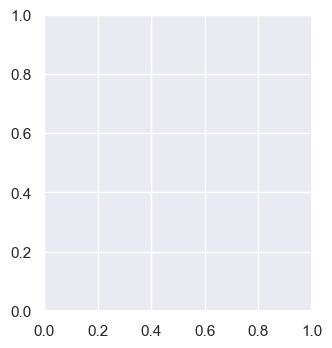

In [31]:
import scipy.stats as stats
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names, 1):
    plt.subplot(11,5,i)
    p=sns.distplot(divorce[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")